#  Analyse spectra holo at AuxTel for Configuration H

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : April 4th  2022
- last update : April 5th 2022


### Configuration H :

    


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

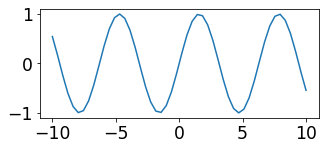

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-04-06'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.2.0'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [13]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [14]:
from time import sleep

In [15]:
from astropy.time import Time
import astropy.units as u

In [16]:
import pickle

# Function

In [17]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [19]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [20]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [21]:
# path index for each month
DATE="20220316"

In [22]:
version="v5.0"

In [23]:
# Choose the config filename

list_of_spectractorconfigfiles= ["auxtel_configA.ini","auxtel_configB.ini","auxtel_configC.ini","auxtel_configD.ini","auxtel_configE.ini","auxtel_configF.ini","auxtel_configG.ini","auxtel_configH.ini"]
config_idx =7
configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]


In [24]:
configdir 

'configH'

# Path

In [25]:
HOSTCC=True

In [26]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/holo/"+configdir+"/"+DATE)
    
else:
    #path_auxtel="/Users/dagoret/DATA/AuxTelData2021"
    path_auxtel="/Users/sylvie/DATA/AuxTelDATA2022/2022"
    #path_spectractor=os.path.join(path_auxtel,"/users/dagoret/MacOSX/github/LSST/Spectractor")
    path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    #path_images=os.path.join(path_auxtel,"holo/quickLookExp_v2/"+DATE)
    path_images=os.path.join(path_auxtel,"holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"OutputSpectractor/holo/"+configdir+"/"+DATE)
    #path_output_spectractor=os.path.join(path_auxtel,"holo/OutputSpectractor/"+DATE)
    

In [27]:
path_output_spectractor

'/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316'

In [28]:
! ls -l $path_output_spectractor

total 0
drwxrws--- 1 dagoret lsst 2 Apr  4 15:13 2022031600330
drwxrws--- 1 dagoret lsst 2 Apr  4 19:32 2022031600331
drwxrws--- 1 dagoret lsst 2 Apr  5 09:12 2022031600337
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600338
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600344
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600345
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600351
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600352
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600358
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600359
drwxrws--- 1 dagoret lsst 2 Apr  5 09:14 2022031600365
drwxrws--- 1 dagoret lsst 2 Apr  5 09:14 2022031600366
drwxrws--- 1 dagoret lsst 2 Apr  5 09:14 2022031600372
drwxrws--- 1 dagoret lsst 2 Apr  5 09:14 2022031600373
drwxrws--- 1 dagoret lsst 2 Apr  5 09:14 2022031600379
drwxrws--- 1 dagoret lsst 2 Apr  5 09:15 2022031600380
drwxrws--- 1 dagoret lsst 2 Apr  5 09:15 2022031600386
drwxrws--- 1 dagoret lsst 2 Apr  5 09:16 2022031600387
dr

In [29]:
# standard configuration for spectractor
#config = os.path.join(path_spectractor_config,"auxtel.ini")
#config=os.path.join("./config",configfilename)
config=configfilename
print(f">>>>> Spectractor configuration filename : {configfilename}")

>>>>> Spectractor configuration filename : ./config/auxtel_configH.ini


## Logbook for file selection

In [30]:
# Logbook for scan data
filename_logbook='logbooks/auxtelholologbook_'+DATE+'_'+ version+'.csv'

In [31]:
df=pd.read_csv(filename_logbook,index_col=0)

In [32]:
pd.set_option('display.max_rows', None)

In [33]:
df

index                     date  \
0       0  2022-03-17T01:59:37.776   
1       1  2022-03-17T02:00:10.693   
2       2  2022-03-17T02:03:04.275   
3       3  2022-03-17T02:03:37.365   
4       4  2022-03-17T02:06:31.026   
5       5  2022-03-17T02:07:03.927   
6       6  2022-03-17T02:11:00.681   
7       7  2022-03-17T02:11:33.581   
8       8  2022-03-17T02:14:30.261   
9       9  2022-03-17T02:15:03.181   
10     10  2022-03-17T02:17:59.397   
11     11  2022-03-17T02:18:32.481   
12     12  2022-03-17T02:22:39.026   
13     13  2022-03-17T02:23:12.104   
14     14  2022-03-17T02:26:07.782   
15     15  2022-03-17T02:26:40.735   
16     16  2022-03-17T02:29:37.041   
17     17  2022-03-17T02:30:10.043   
18     18  2022-03-17T02:34:15.754   
19     19  2022-03-17T02:34:48.848   
20     20  2022-03-17T02:38:56.232   
21     21  2022-03-17T02:39:29.123   
22     22  2022-03-17T03:11:58.564   
23     23  2022-03-17T03:12:31.562   
24     24  2022-03-17T03:15:28.519   
25     25  2022-03-17T03:16:01.707   
26     26  2022-03-17T03:21:49.842   
27     27  2022-03-17T03:22:22.856   

                                               path  \
0   /sps/lsst/groups/auxtel/data/2022/holo/20220316   
1   /sps/lsst/groups/auxtel/data/2022/holo/20220316   
2   /sps/lsst/groups/auxtel/data/2022/holo/20220316   
3   /sps/lsst/groups/auxtel/data/2022/holo/20220316   
4   /sps/lsst/groups/auxtel/data/2022/holo/20220316   
5   /sps/lsst/groups/auxtel/data/2022/holo/20220316   
6   /sps/lsst/groups/auxtel/data/2022/holo/20220316   
7   /sps/lsst/groups/auxtel/data/2022/holo/20220316   
8   /sps/lsst/groups/auxtel/data/2022/holo/20220316   
9   /sps/lsst/groups/auxtel/data/2022/holo/20220316   
10  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
11  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
12  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
13  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
14  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
15  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
16  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
17  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
18  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
19  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
20  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
21  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
22  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
23  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
24  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
25  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
26  /sps/lsst/groups/auxtel/data/2022/holo/20220316   
27  /sps/lsst/groups/auxtel/data/2022/holo/20220316   

                                      file  num    object   filter  disperser  \
0   exposure_2022031600330_postisrccd.fits  330   ETA DOR  empty_1  holo4_003   
1   exposure_2022031600331_postisrccd.fits  331   ETA DOR  empty_1  holo4_003   
2   exposure_2022031600337_postisrccd.fits  337   ETA DOR  empty_1  holo4_003   
3   exposure_2022031600338_postisrccd.fits  338   ETA DOR  empty_1  holo4_003   
4   exposure_2022031600344_postisrccd.fits  344   ETA DOR  empty_1  holo4_003   
5   exposure_2022031600345_postisrccd.fits  345   ETA DOR  empty_1  holo4_003   
6   exposure_2022031600351_postisrccd.fits  351  HD111980  empty_1  holo4_003   
7   exposure_2022031600352_postisrccd.fits  352  HD111980  empty_1  holo4_003   
8   exposure_2022031600358_postisrccd.fits  358  HD111980  empty_1  holo4_003   
9   exposure_2022031600359_postisrccd.fits  359  HD111980  empty_1  holo4_003   
10  exposure_2022031600365_postisrccd.fits  365  HD111980  empty_1  holo4_003   
11  exposure_2022031600366_postisrccd.fits  366  HD111980  empty_1  holo4_003   
12  exposure_2022031600372_postisrccd.fits  372   ETA DOR  empty_1  holo4_003   
13  exposure_2022031600373_postisrccd.fits  373   ETA DOR  empty_1  holo4_003   
14  exposure_2022031600379_postisrccd.fits  379   ETA DOR  empty_1  holo4_003   
15  expos

## Selection of input files

In [34]:
# Do not consider flag
#df_good=df[df["quality"]==1]

In [35]:
df_good=df
df_good["quality"] = 1

In [36]:
for spectra_file in df_good["file"]:
    print(spectra_file)

exposure_2022031600330_postisrccd.fits
exposure_2022031600331_postisrccd.fits
exposure_2022031600337_postisrccd.fits
exposure_2022031600338_postisrccd.fits
exposure_2022031600344_postisrccd.fits
exposure_2022031600345_postisrccd.fits
exposure_2022031600351_postisrccd.fits
exposure_2022031600352_postisrccd.fits
exposure_2022031600358_postisrccd.fits
exposure_2022031600359_postisrccd.fits
exposure_2022031600365_postisrccd.fits
exposure_2022031600366_postisrccd.fits
exposure_2022031600372_postisrccd.fits
exposure_2022031600373_postisrccd.fits
exposure_2022031600379_postisrccd.fits
exposure_2022031600380_postisrccd.fits
exposure_2022031600386_postisrccd.fits
exposure_2022031600387_postisrccd.fits
exposure_2022031600393_postisrccd.fits
exposure_2022031600394_postisrccd.fits
exposure_2022031600400_postisrccd.fits
exposure_2022031600401_postisrccd.fits
exposure_2022031600420_postisrccd.fits
exposure_2022031600421_postisrccd.fits
exposure_2022031600427_postisrccd.fits
exposure_2022031600428_po

## Selection of Spectractor output files

In [37]:
# total number of exposures
NBEXP=0
# total number of exposures without dir
NBEXPNODIR=0
# total number of exposures with dir
NBEXPWTHDIR=0
# total number of exposures with plots
NBEXPWTHPLT=0
# total number of exposures with spectra
NBEXPWTHSPEC=0

# list of exposures
LISTNUM=[]
# list of exposure without dir (not run spectraction)
LISTNUMNODIR=[]
# list of exposure with dir (spectraction has been run)
LISTNUMWTHDIR=[]
# list of exposures with plots (Spectractor has run up to some point)
LISTNUMWTHPLOTS=[]
# list of exposures with spectraction output (Spectractor has completed)
LISTNUMWTHSPECTR=[]

# list of selected spectra path
List_of_spectra_path=[]

In [38]:
list_of_files=os.listdir(path_output_spectractor)
list_of_files=sorted(list_of_files)


print("list of subdir found ",list_of_files)

for subdir in list_of_files:
    
    
    #tag = file_tag_forsorting(subdir)
    tag = subdir_tag_forsorting(subdir)
    
        
    print(tag)    
    #if tag is not None and int(tag)<317:
    #    continue
    if tag is None :
        continue
  
    
    
    fulldir=os.path.join(path_output_spectractor,subdir)



    if not os.path.isdir(fulldir):
        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is not a directory".format(subdir))
        

        NBEXPNODIR+=1


    else:

        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is a directory".format(subdir))

        tagname=subdir_tag_forsorting(subdir)
        print("tagname= {}".format(tagname))
        #targetname=file_target(subdir)
        #print("targetname= {}".format(targetname))
        



        NBEXP += 1
        LISTNUM.append(tagname)



        dir_plots=os.path.join(fulldir,"plots")
        dir_spectration = os.path.join(fulldir, "basespec")

        flag_empty1 = True
        flag_empty2 = True


        if os.path.isdir(dir_plots):
            if any(os.scandir(dir_plots)):
                print("dir_plots is not empty")
                NBEXPWTHPLT+=1
                LISTNUMWTHPLOTS.append(tagname)
                flag_empty1 = False

            else:
                print("dir_plots is empty")


        if os.path.isdir(dir_spectration):
            if any(os.scandir(dir_spectration)):
                print("dir_spectration is not empty")
                NBEXPWTHSPEC+=1
                LISTNUMWTHSPECTR.append(tagname)
                flag_empty2 = False
                List_of_spectra_path.append(dir_spectration)

            else:
                print("dir_spectration is empty")

        if flag_empty1 and flag_empty2 :
            NBEXPNODIR+=1
            LISTNUMNODIR.append(tagname)
        else:
            NBEXPWTHDIR += 1
            LISTNUMWTHDIR.append(tagname)



print("-----------------------------------------------------------------")


#LISTNUM=sorted(LISTNUM)
#LISTNUMNODIR=sorted(LISTNUMNODIR)
#LISTNUMWTHDIR=sorted(LISTNUMWTHDIR)
#LISTNUMWTHPLOTS=sorted(LISTNUMWTHPLOTS)
#LISTNUMWTHSPECTR=sorted(LISTNUMWTHSPECTR)
List_of_spectra_path=sorted(List_of_spectra_path)

print("Full list of Exposures : .......................{}".format(LISTNUM))
print("Full list of Exposures without output dir: .....{}".format(LISTNUMNODIR))
print("Full list of Exposures with output dir: ....... {}".format(LISTNUMWTHDIR))
print("Full list of Exposures with output plots: ..... {}".format(LISTNUMWTHPLOTS))
print("Full list of Exposures with output spectra: ....{}".format(LISTNUMWTHSPECTR))




print("Total number of exposures : .....................{}".format(NBEXP))
print("Total number of exposures without dir : .........{}".format(NBEXPNODIR))
print("Total number of exposures with dir :.............{}".format(NBEXPWTHDIR))
print("Total number of exposures with plots : ..........{}".format(NBEXPWTHPLT))
print("Total number of exposures with spectra: .........{}".format(NBEXPWTHSPEC))


list of subdir found  ['2022031600330', '2022031600331', '2022031600337', '2022031600338', '2022031600344', '2022031600345', '2022031600351', '2022031600352', '2022031600358', '2022031600359', '2022031600365', '2022031600366', '2022031600372', '2022031600373', '2022031600379', '2022031600380', '2022031600386', '2022031600387', '2022031600393', '2022031600394', '2022031600400', '2022031600401', '2022031600420', '2022031600421', '2022031600427', '2022031600428', '2022031600434', '2022031600435']
00330
---------------------------------------------
2022031600330  	   00330
2022031600330 is a directory
tagname= 00330
dir_plots is not empty
dir_spectration is not empty
00331
---------------------------------------------
2022031600331  	   00331
2022031600331 is a directory
tagname= 00331
dir_plots is not empty
dir_spectration is not empty
00337
---------------------------------------------
2022031600337  	   00337
2022031600337 is a directory
tagname= 00337
dir_plots is not empty
dir_spectra

In [39]:
#dir_spectra="outputs_reprocess"
print(List_of_spectra_path)

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600337/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600344/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600345/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600351/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600358/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600366/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600372/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600373/basespec',

In [40]:
config

'./config/auxtel_configH.ini'

## Extraction of spectra

In [41]:
all_files_spectra = []
all_files_spectrogram = []
all_files_lines = []
all_files_table = []

# loop on topdir
for dir_spectra in List_of_spectra_path:
    for filename in os.listdir(dir_spectra):
        if re.search("_spectrum.fits$",filename):
            the_file_spectrum=os.path.join(dir_spectra,filename)
            all_files_spectra.append(the_file_spectrum)
            the_file_spectrogram=the_file_spectrum.replace("_spectrum","_spectrogram")
            all_files_spectrogram.append(the_file_spectrogram)
            the_file_lines=the_file_spectrum.replace("_spectrum.fits","_lines.csv")
            all_files_lines.append(the_file_lines)
            the_file_table=the_file_spectrum.replace("_spectrum.fits","_table.csv")
            all_files_table.append(the_file_table)
    

In [42]:
all_files_spectra[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_spectrum.fits']

In [43]:
all_files_spectrogram[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_spectrogram.fits']

In [44]:
all_files_lines[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_lines.csv']

In [45]:
all_files_table[:3] 

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_table.csv']

## Selection of good spectra

In [46]:
all_good_spectra_spectrum_files = sorted(all_files_spectra)

In [47]:
N=len(all_good_spectra_spectrum_files)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

## All Spectra

0 ) exposure_2022031600330_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum.fits
No rebinning: parameters.REBIN is forced to 1.
set date_obs to 2022-03-17T01:59:23.629
set expo to 20.0
set airmass to 1.38578152736243
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1328767654984717
set dec to -66.0397222222222
set hour_angle to 42.0596414253711
set temperature to 10.6
set pressure to 743.55
set humidity to 44.0
set lambda_ref to 614.3216265213576
set parallactic_angle to 56.6019400533159


/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      ...  Z_VALUE  SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                           
----------- ------------- ------------- ... --------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635 ... 0.0000590                1
1 ) exposure_2022031600331_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits
No rebinning: parameters.REBIN is forced to 1.
set date_obs to 2022-03-17T01:59:56.544
set expo to 20.0
set airmass to 1.386860919079735
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.143414192888017
set dec to -66.0397222222222
set hour_angle to 42.19664412811424
set temperature to 10.6
set pressure to 743.55
set humidity to 44.0
set lambda_ref to 640.2918338104603
set parallactic_angle to 56.75888867802155
t

/tmp/ipykernel_1689/3127726432.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(16,4))


No rebinning: parameters.REBIN is forced to 1.
set date_obs to 2022-03-17T03:15:47.551
set expo to 20.0
set airmass to 1.279213132458975
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1674602010925815
set dec to -18.5222222222222
set hour_angle to -40.81998111646455
set temperature to 10.7
set pressure to 743.5
set humidity to 49.0
set lambda_ref to 665.3594564651956
set parallactic_angle to -115.5470881311961
target_name = HD111980, Selected object name for Simbad : HD111980
 MAIN_ID        RA           DEC      ... Z_VALUE_21 SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                            
--------- ------------- ------------- ... ---------- ----------------
HD 111980 12 53 15.0529 -18 31 20.013 ...  0.0005170                1
21 ) exposure_2022031600434_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600434/basespec/exposure_2022031600434_postisrccd_spectrum.fits


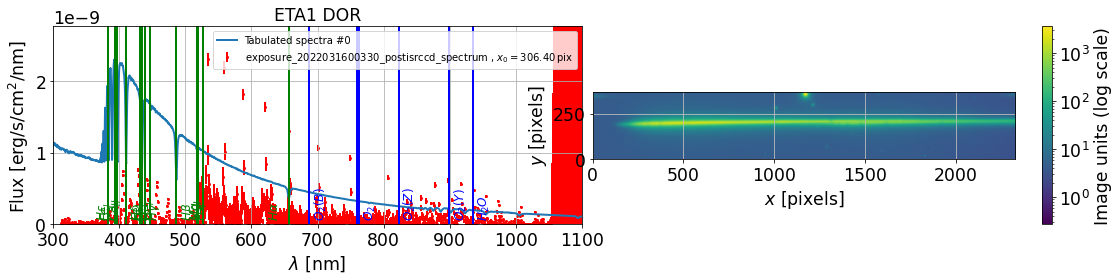

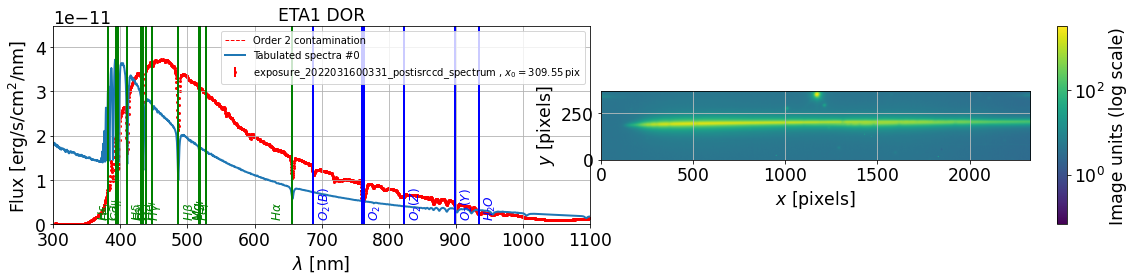

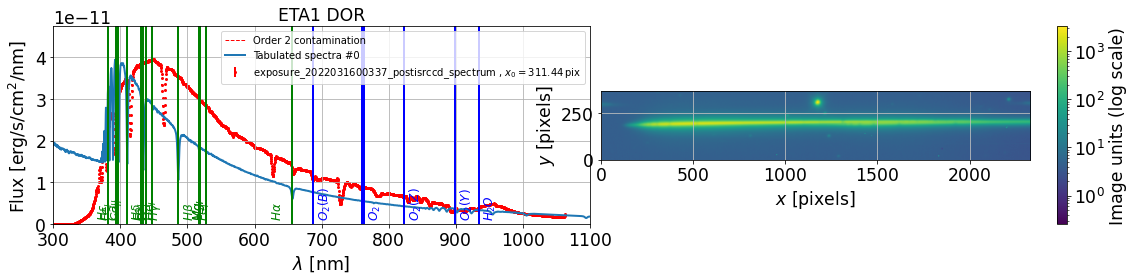

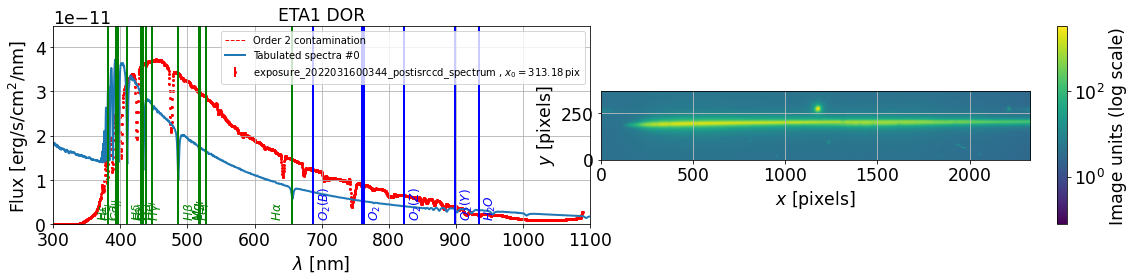

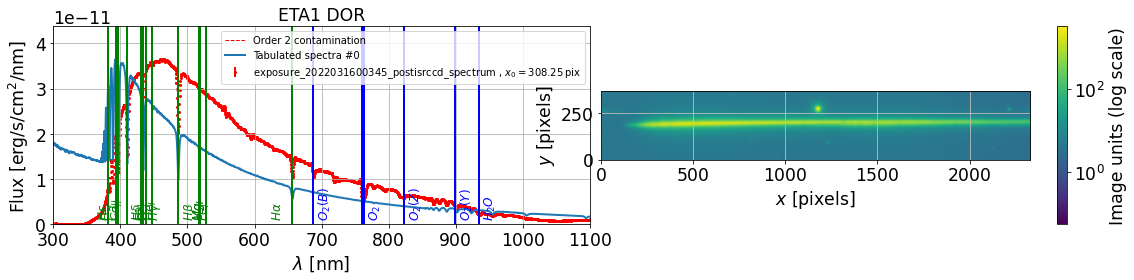

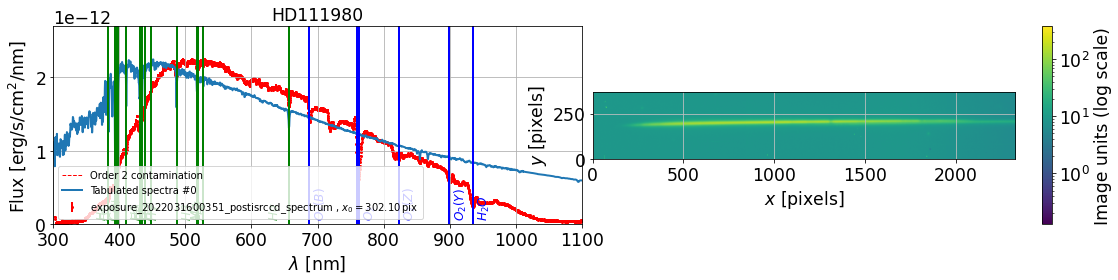

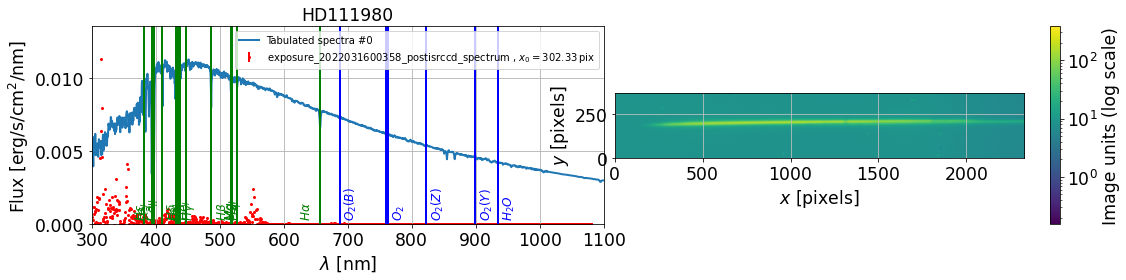

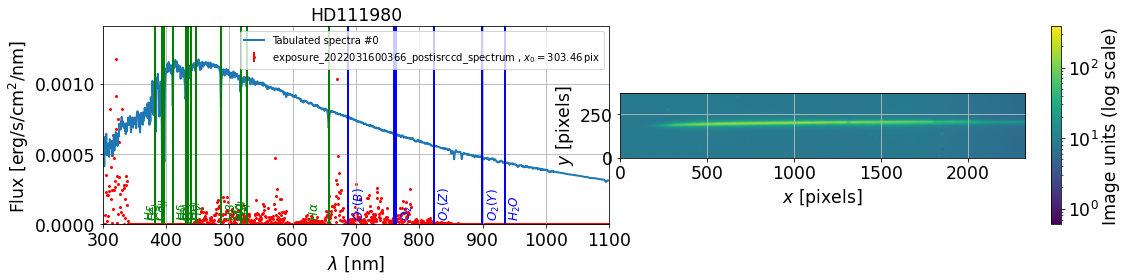

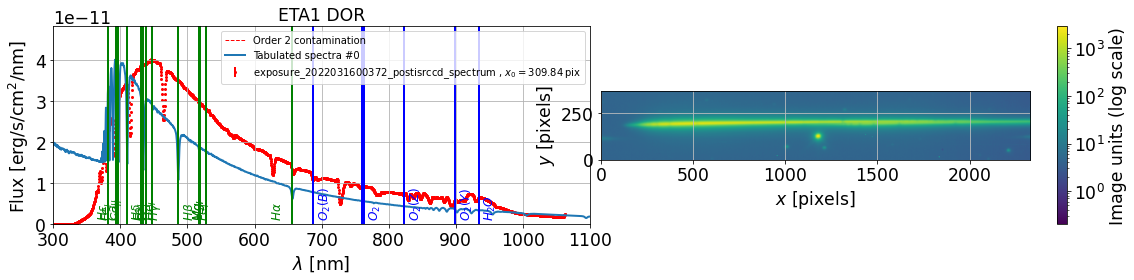

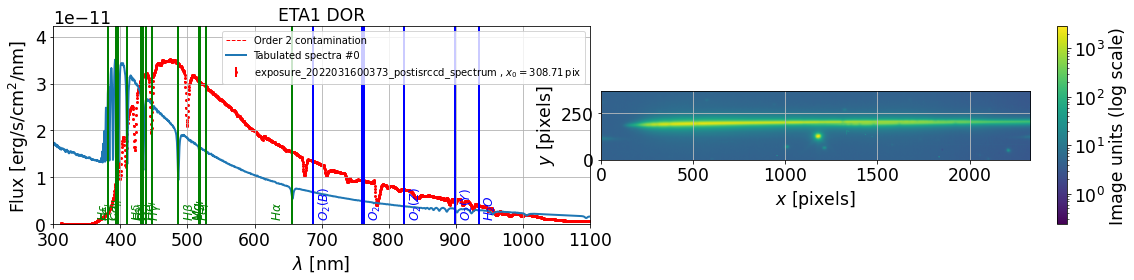

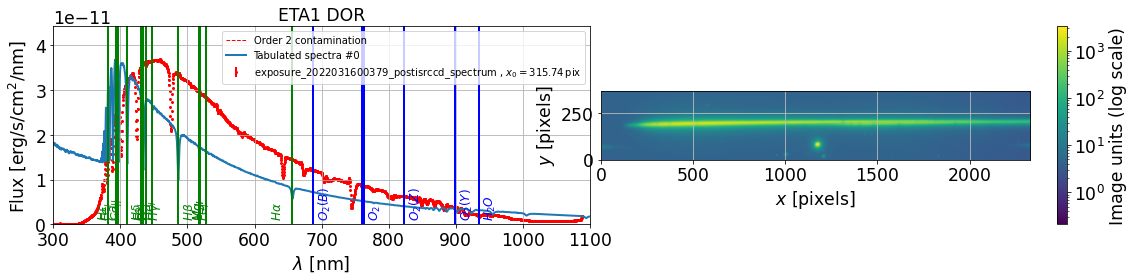

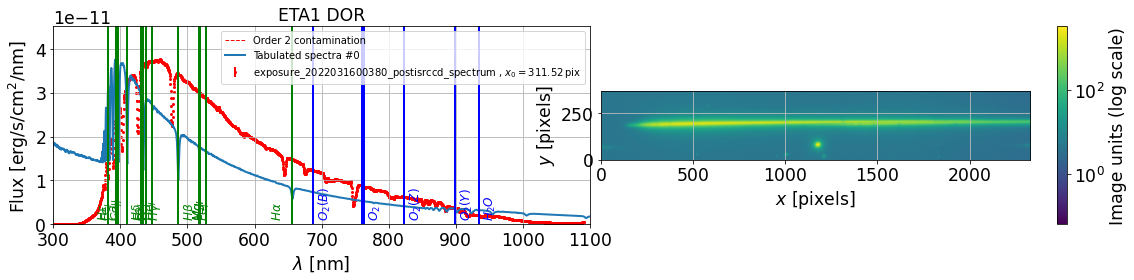

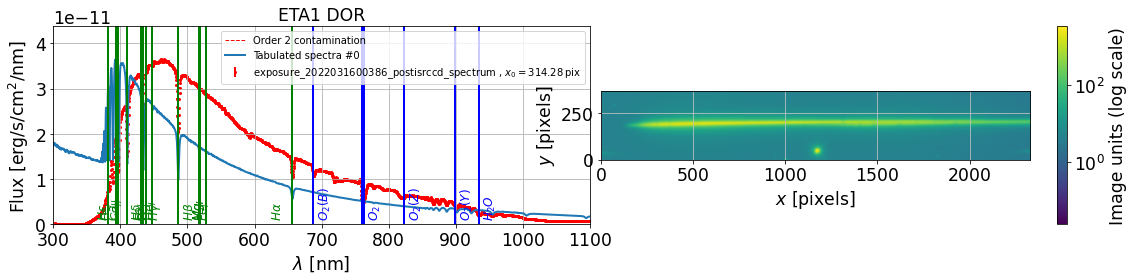

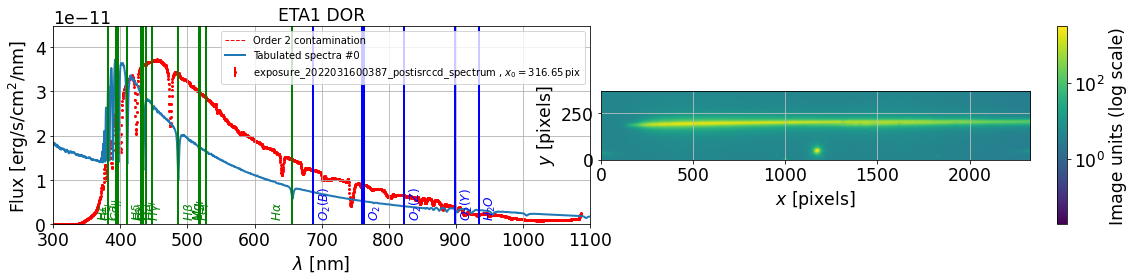

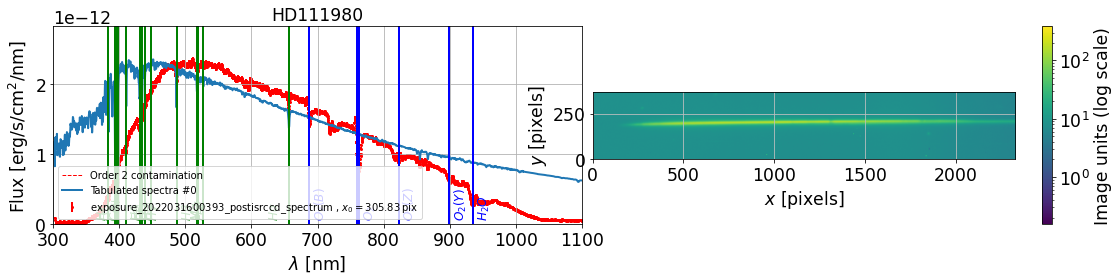

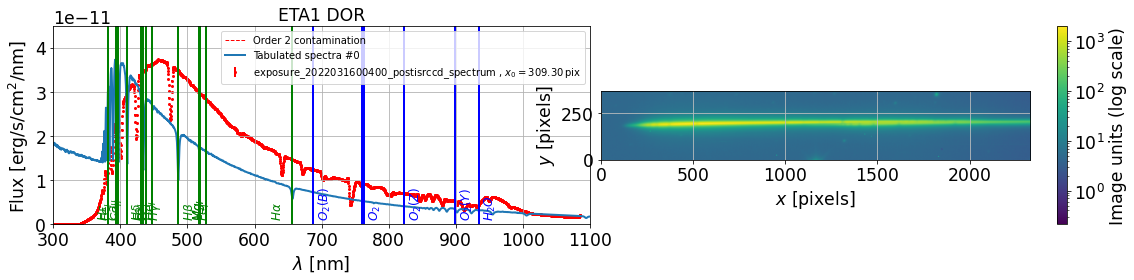

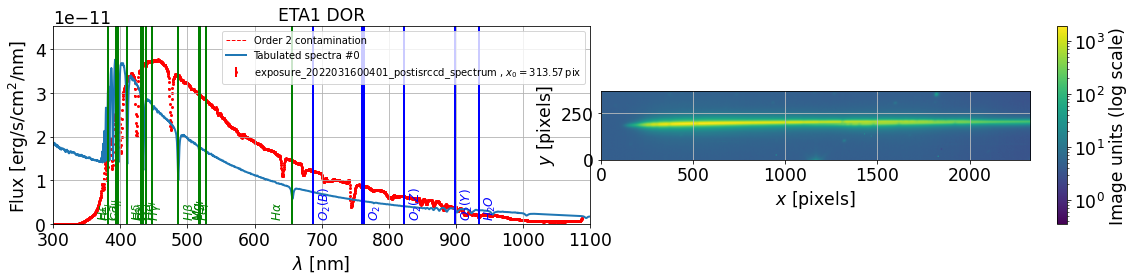

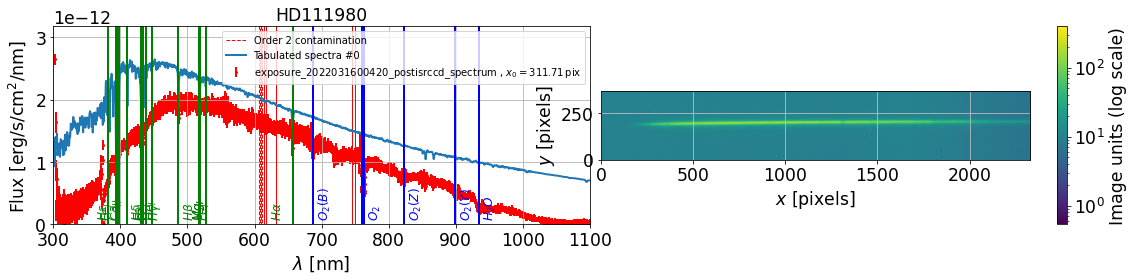

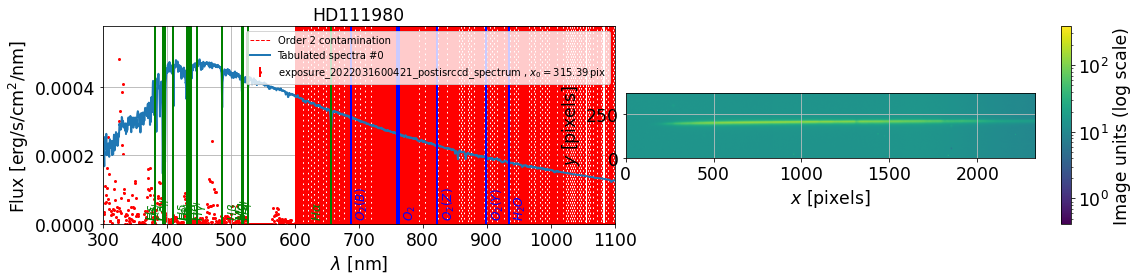

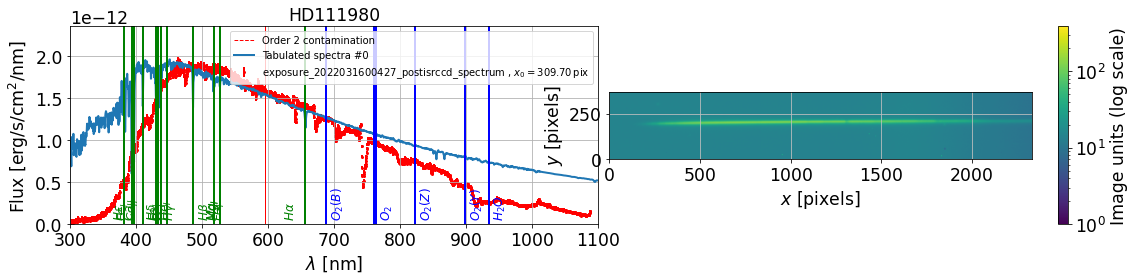

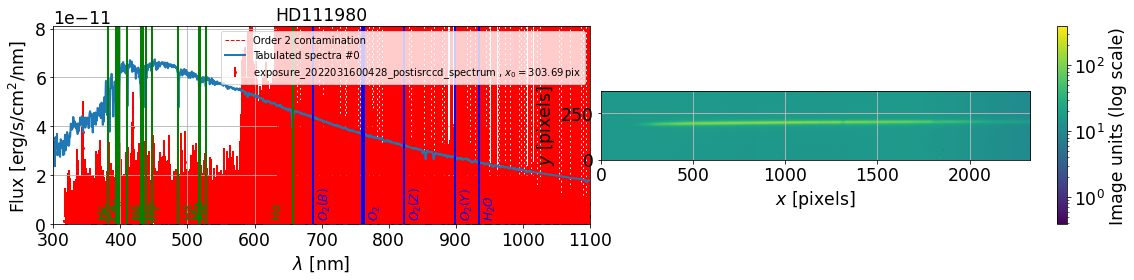

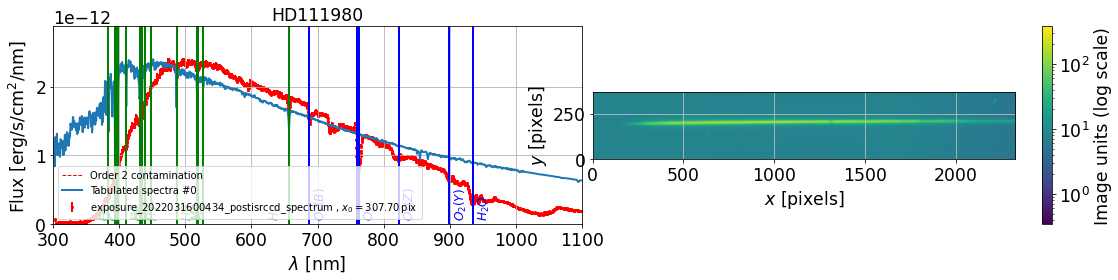

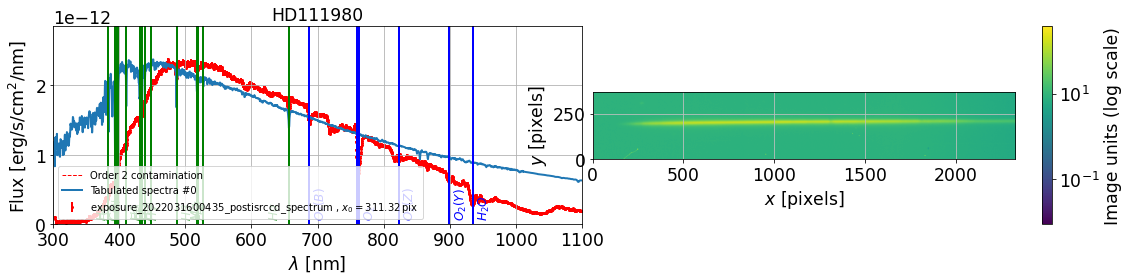

In [48]:
parameters.DISPLAY=True

FLAG_ORDER2 = True

infos = []
all_lambdas=[]
all_data=[]
all_data_err=[]

if FLAG_ORDER2:
    all_lambdas_order2=[]
    all_data_order2=[]
    all_data_err_order2=[]

all_num=[]
all_figs = []


idx=0
for fullfilename in all_good_spectra_spectrum_files:
    
    filename = os.path.basename(fullfilename)
    print(idx,")",filename," ",fullfilename)
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    
    filename= os.path.basename(fullfilename)
    tag=file_tag_forsorting(filename.split(".")[0])
    all_num.append(tag)
    
   
     
    s=Spectrum(fullfilename, config=config,fast_load=False)
    label=filename.split('.')[0]+" "
    s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
    all_lambdas.append(s.lambdas)
    all_data.append(s.data)
    all_data_err.append(s.err)
    
    if FLAG_ORDER2:
        all_lambdas_order2.append(s.lambdas_order2)
        all_data_order2.append(s.data_order2)
        all_data_err_order2.append(s.err_order2)
    
    ax2 = fig.add_subplot(1, 2, 2)
    
    fullfilename2=all_files_spectrogram[idx]
    
    s.load_spectrogram(fullfilename2)
    s.plot_spectrogram(ax=ax2,scale="log")
    
    
    infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    
    
    plt.show()
    all_figs.append(fig)
    
    idx+=1
    

## Save figures in a pdf filename

In [49]:
def SaveFigSpectraInPdf(nbspecperpage=5):
    
    Nspec= len(all_good_spectra_spectrum_files)
    Nbpages = np.ceil(Nspec/nbspecperpage)
    idx_inpage = nbspecperpage
    idx_pagenum = 0
    idx = 0
    
    all_composed_figs = []
    
    for fullfilename in all_good_spectra_spectrum_files:
        
        if idx_inpage == nbspecperpage:
            idx_inpage = 1
            idx_pagenum += 1
            
            if idx_pagenum > 1:
                all_composed_figs.append(fig)
            
            # create a new figure 
            fig=plt.figure(figsize=(16,20))
        else:
            idx_inpage += 1   
                             
        idx_fig = 2*(idx_inpage-1)+1
        
        print(f"\t \t  SaveFigSpectraInPdf >>>>>>>>  spec num = {idx}, pagenum = {idx_pagenum}/{Nbpages}, idx_inpage = {idx_inpage}, idx_fig = {idx_fig}")        
       
        
    
        filename = os.path.basename(fullfilename)
        

        ax1 = fig.add_subplot(nbspecperpage, 2, idx_fig)
    
        filename= os.path.basename(fullfilename)
        tag=file_tag_forsorting(filename.split(".")[0])
     
     
        s=Spectrum(fullfilename, config=config,fast_load=False);
        label=filename.split('.')[0]+" "
        s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
    
        ax2 = fig.add_subplot(nbspecperpage, 2, idx_fig+1)
    
        fullfilename2=all_files_spectrogram[idx]
    
        s.load_spectrogram(fullfilename2)
        s.plot_spectrogram(ax=ax2,scale="log")
    
        plt.show()
                           
        idx+=1
                           
        if idx == Nspec:
             all_composed_figs.append(fig)
                           
    return  all_composed_figs
    


In [50]:
def SaveFigSpectraSummaryInPdf(all_wl,all_spec,all_tag,delta=0, 
                thetitle="Hologram, spectrum night 2022-03-16", 
                thexlabel="$\\lambda$ (nm)",theylabel="Flux (erg/cm^2/s/nm)",figsize=(14,8)):
    """
    """
    
    
    
    
    NN=len(all_wl)
    
    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NN)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NN), alpha=1)
    
    
    fig=plt.figure(figsize=figsize)
    ax=fig.add_subplot(1,1,1)
    
    idx=0
    for idx in range(NN):
        
        label=all_tag[idx]
        ax.plot(all_wl[idx],all_spec[idx]+delta,label=label,color=all_colors[idx])
        if delta !=0:
            plt.text(250.,all_spec[idx][0]+delta, f'{label}',color=all_colors[idx],fontsize=10)
        
    ax.set_xlabel(thexlabel)
    ax.set_ylabel(theylabel)
    ax.set_xlim(250.,1100)
    ax.grid()
    ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
    ax.set_title(thetitle)
    plt.show()
    return fig

In [51]:
def SaveFigSpectraSummaryBothInPdf(all_wl,all_spec,all_tag,delta=0, 
                thetitle="Hologram, spectrum", 
                thexlabel="$\\lambda$ (nm)",theylabel="Flux (erg/cm^2/s/nm)",figsize=(12,20)):
    """
    
    """
    
    NN=len(all_wl)
    
    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NN)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NN), alpha=1)
    
    
    fig=plt.figure(figsize=figsize)
    
    gs = gridspec.GridSpec(2, 1,height_ratios=[1, 3] ,figure=fig)
    
    ax=fig.add_subplot(gs[0,0])
    
    idx=0
    for idx in range(NN):
        
        label=all_tag[idx]
        ax.plot(all_wl[idx],all_spec[idx],label=label,color=all_colors[idx])
        #if delta !=0:
        #    ax.plot(all_lambdas[idx],all_data[idx]+delta,label=label,color=all_colors[idx])
        #    plt.text(250.,all_spec[idx][0]+delta, f'{label}',color=all_colors[idx],fontsize=10)
            
        
    ax.set_ylabel(theylabel)
    ax.set_xlim(250.,1100)
    ax.grid()
    #ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
    ax.set_title("superimposed spectra")
    
    #ax=fig.add_subplot(2,1,2)
    ax=fig.add_subplot(gs[1,0])
    
    
    idx=0
    for idx in range(NN):
        
        deltashift=idx*delta
        
        label=all_tag[idx]
        
        if delta ==0:
            
            ax.plot(all_wl[idx],all_spec[idx]+deltashift,label=label,color=all_colors[idx])
            plt.text(250.,all_spec[idx][0]+deltashift, f'{label}',color=all_colors[idx],fontsize=10)
        elif delta !=0:
            plt.text(250.,all_spec[idx][0]+deltashift, f'{label}',color=all_colors[idx],fontsize=10)
            ax.plot(all_wl[idx],all_spec[idx]+deltashift,label=label,color=all_colors[idx])
        
    ax.set_xlabel(thexlabel)
    ax.set_ylabel(theylabel)
    ax.set_xlim(250.,1100)
    ax.grid()
    #ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
    ax.set_title(f"shifted spectra by $\\delta f = $ {delta:.3e}")
    
    
    plt.suptitle(thetitle,y=0.95,fontsize=20,fontweight="bold")
    #plt.tight_layout()
    plt.show()
    return fig
        
    
    

### Individual spectra

	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 0, pagenum = 1/5.0, idx_inpage = 1, idx_fig = 1
No rebinning: parameters.REBIN is forced to 1.
set date_obs to 2022-03-17T01:59:23.629
set expo to 20.0
set airmass to 1.38578152736243
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1328767654984717
set dec to -66.0397222222222
set hour_angle to 42.0596414253711
set temperature to 10.6
set pressure to 743.55
set humidity to 44.0
set lambda_ref to 614.3216265213576
set parallactic_angle to 56.6019400533159
target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      ... Z_VALUE_24 SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                            
----------- ------------- ------------- ... ---------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635 ...  0.0000590                1
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 1, pagenum = 1/5.0, idx_inpage = 2, idx_fig = 3
No rebinni

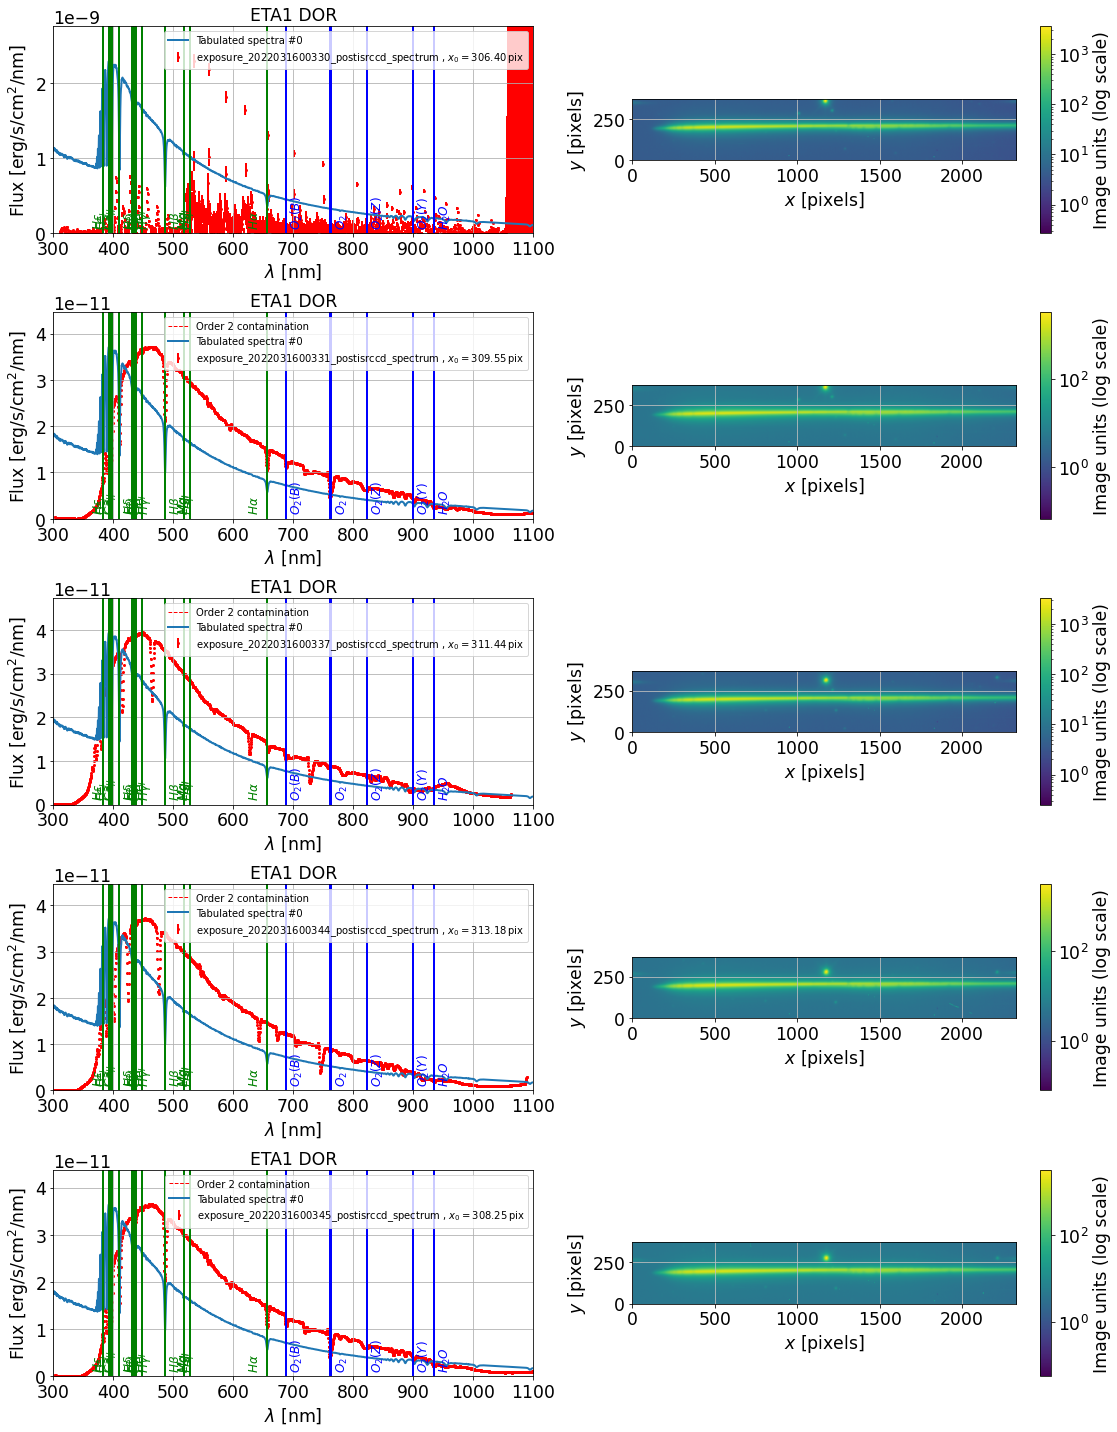

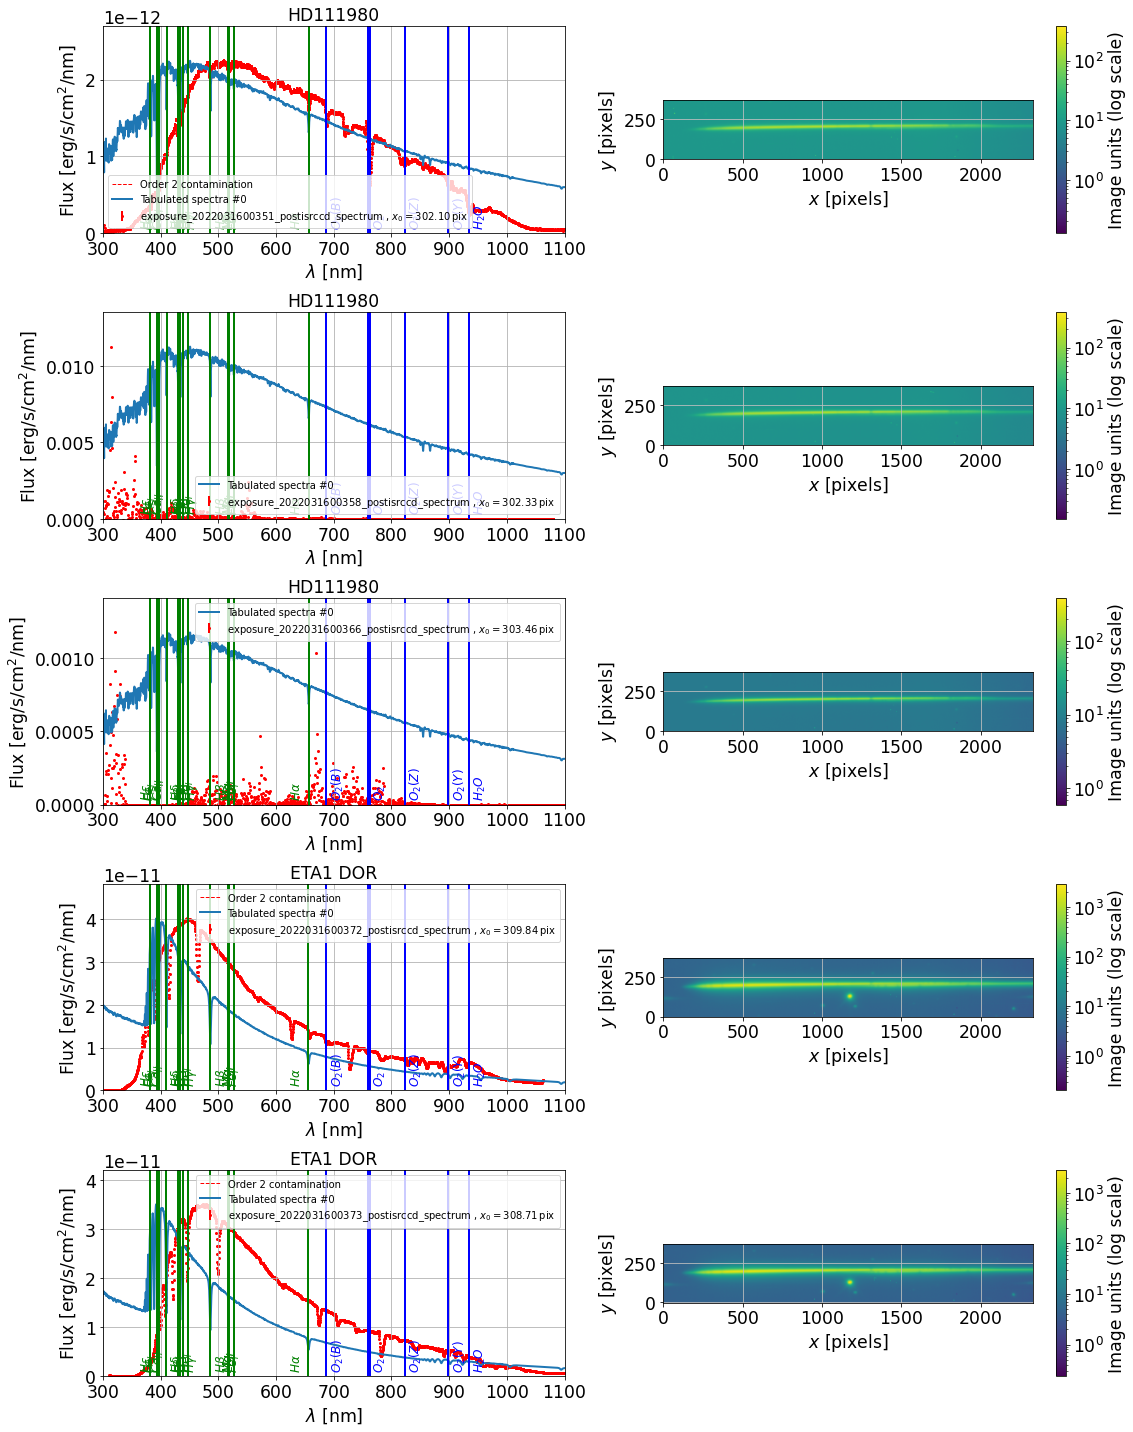

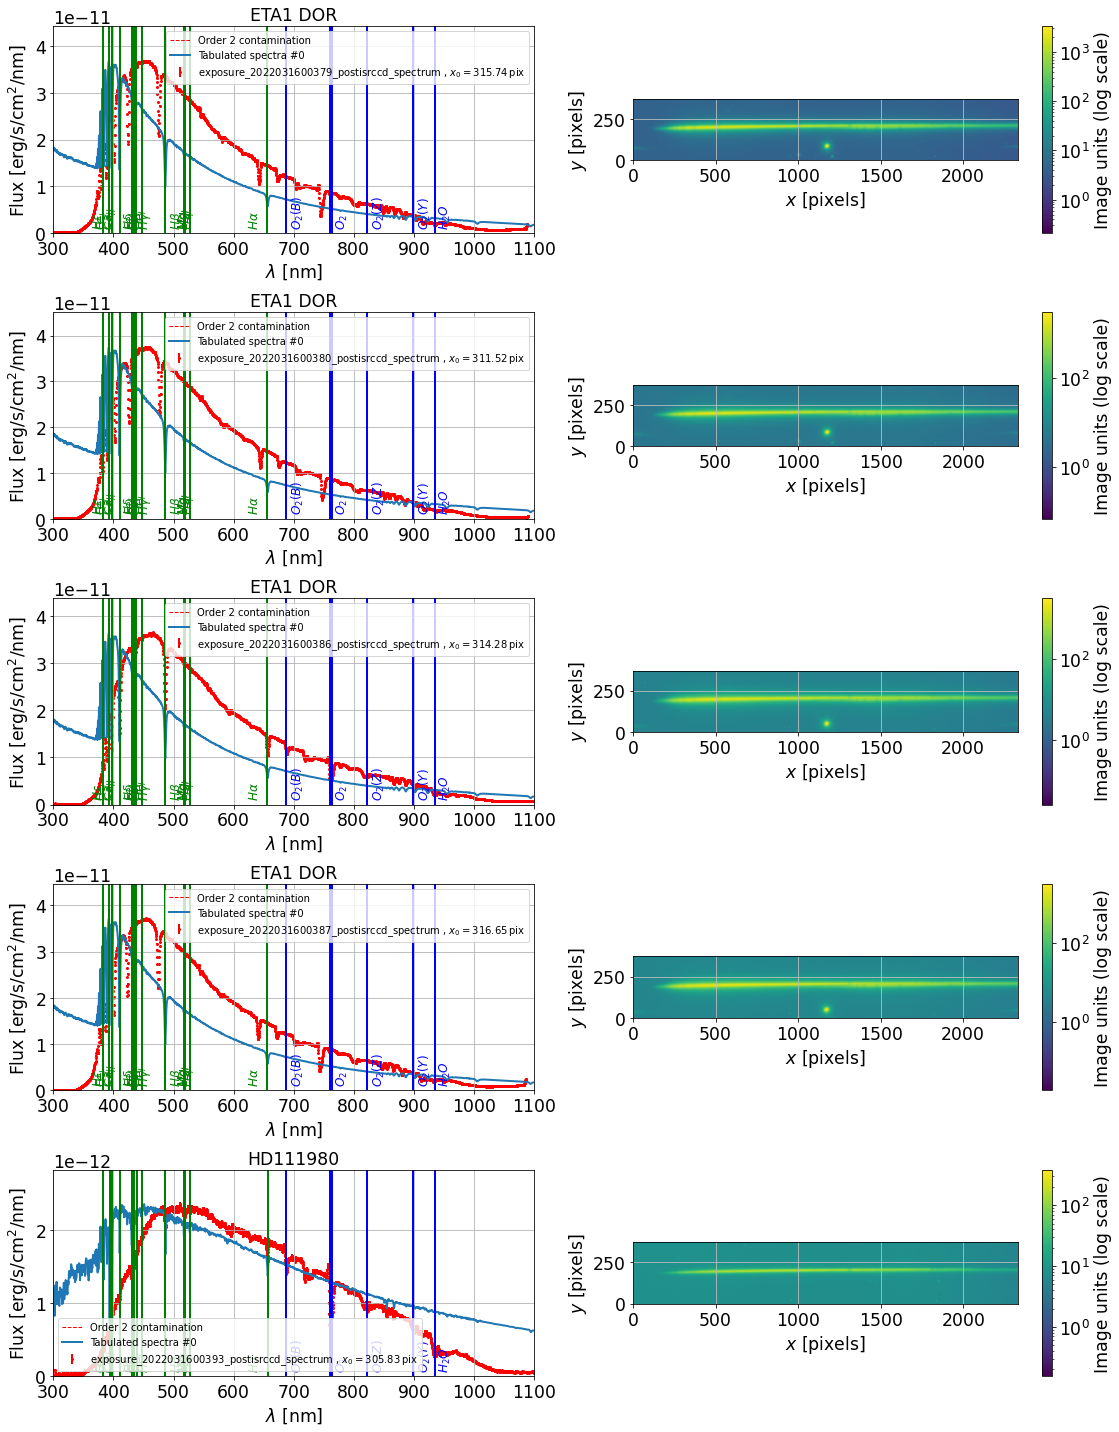

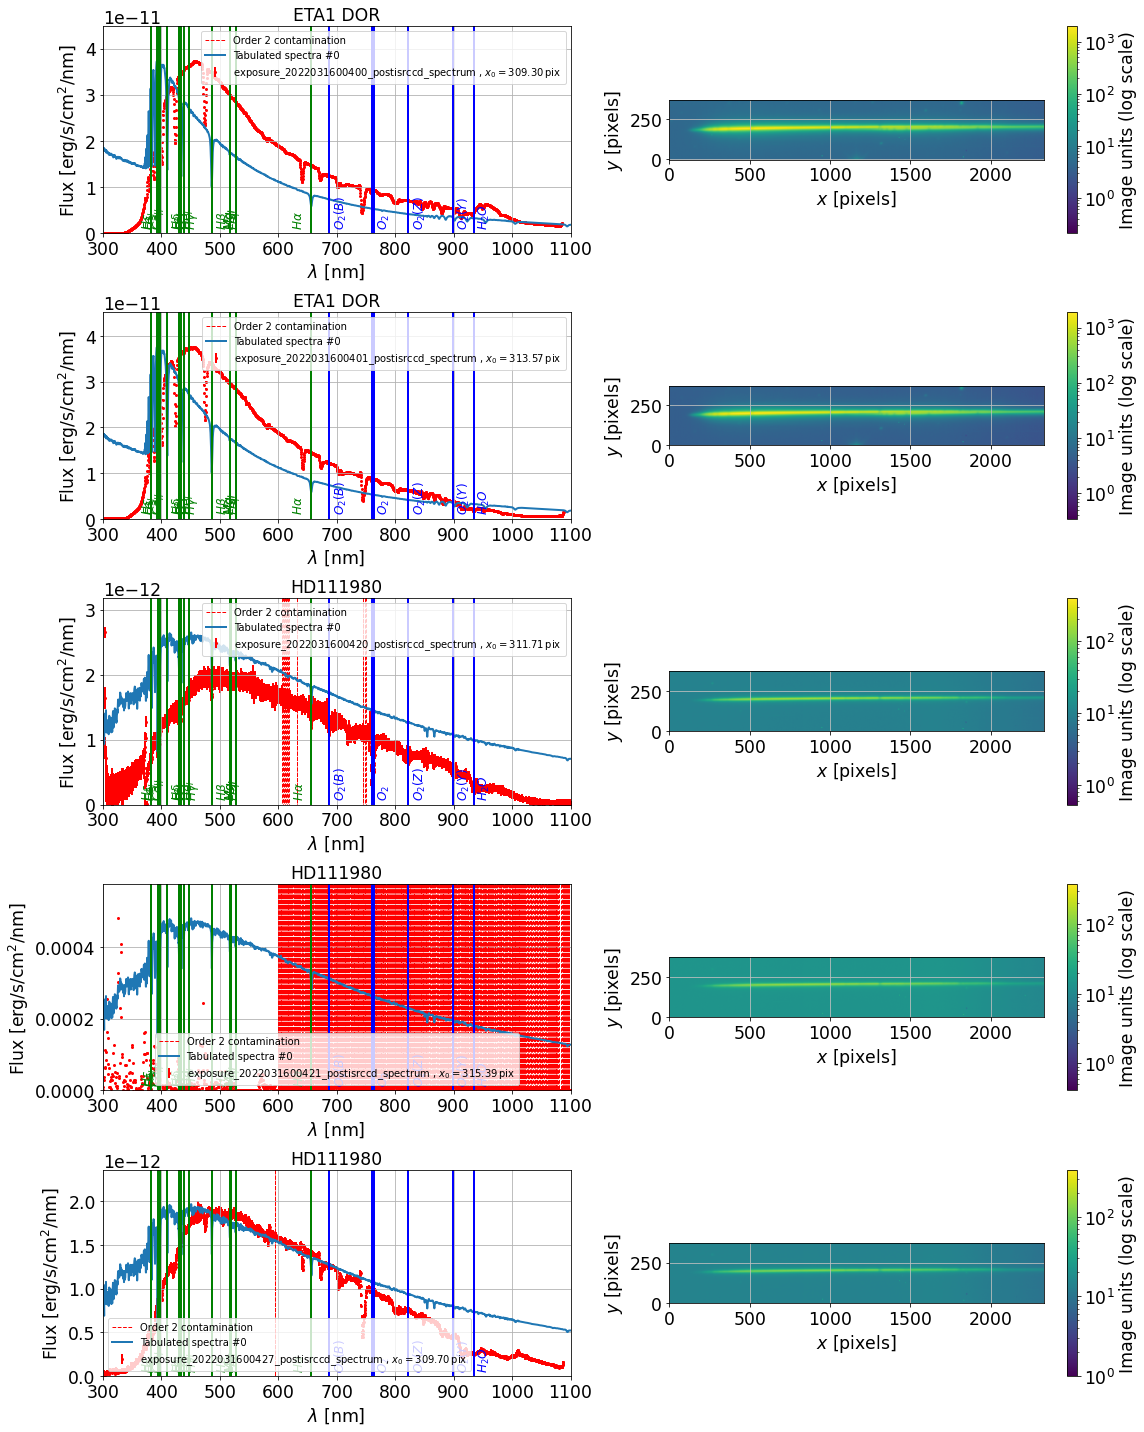

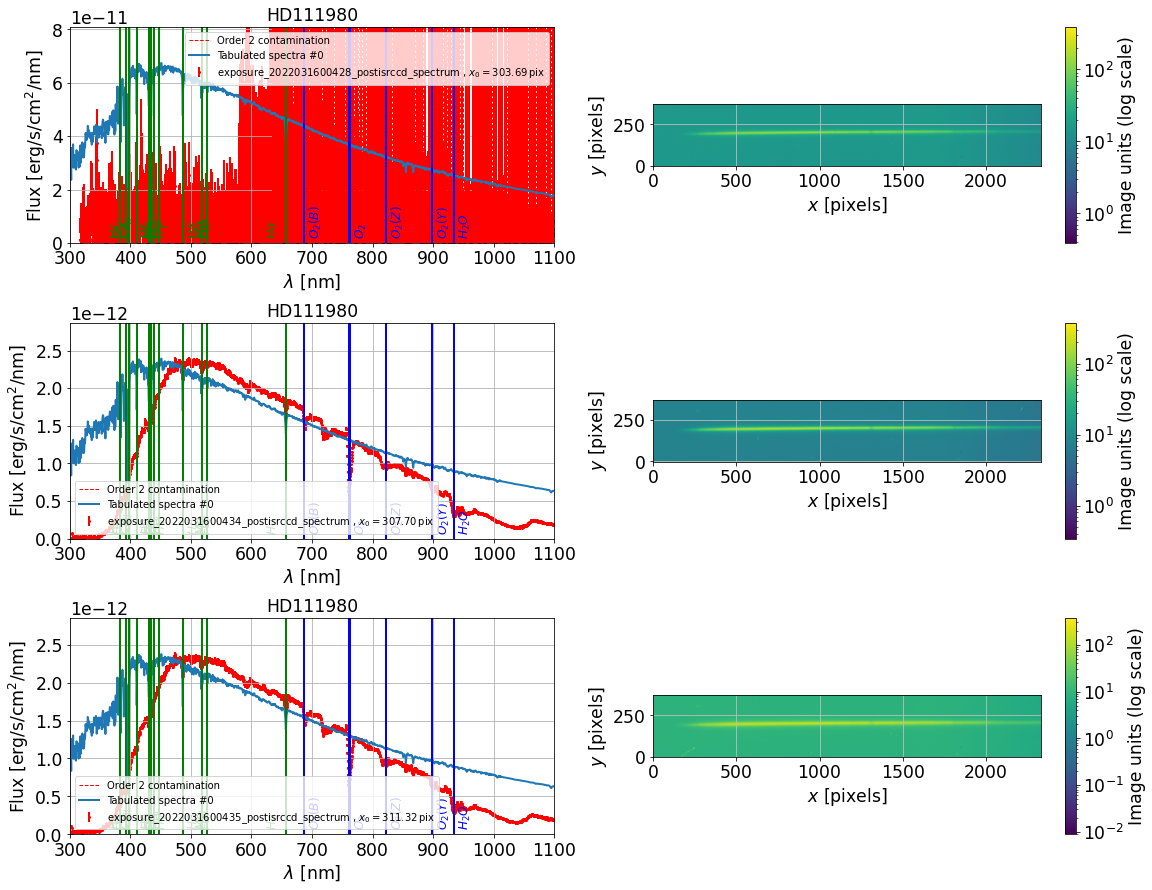

In [52]:
all_figs = SaveFigSpectraInPdf(nbspecperpage=5)

### Summary spectra

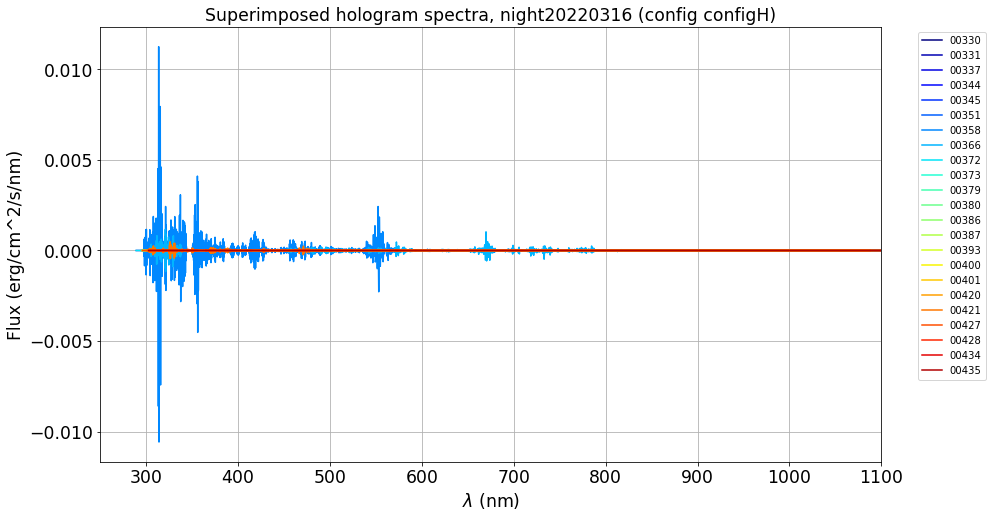

In [53]:
thetitle = f"Superimposed hologram spectra, night{DATE} (config {configdir})"
sumfig = SaveFigSpectraSummaryInPdf(all_lambdas,all_data,all_num,delta=0, thetitle=thetitle)

In [54]:
all_figs.append(sumfig)

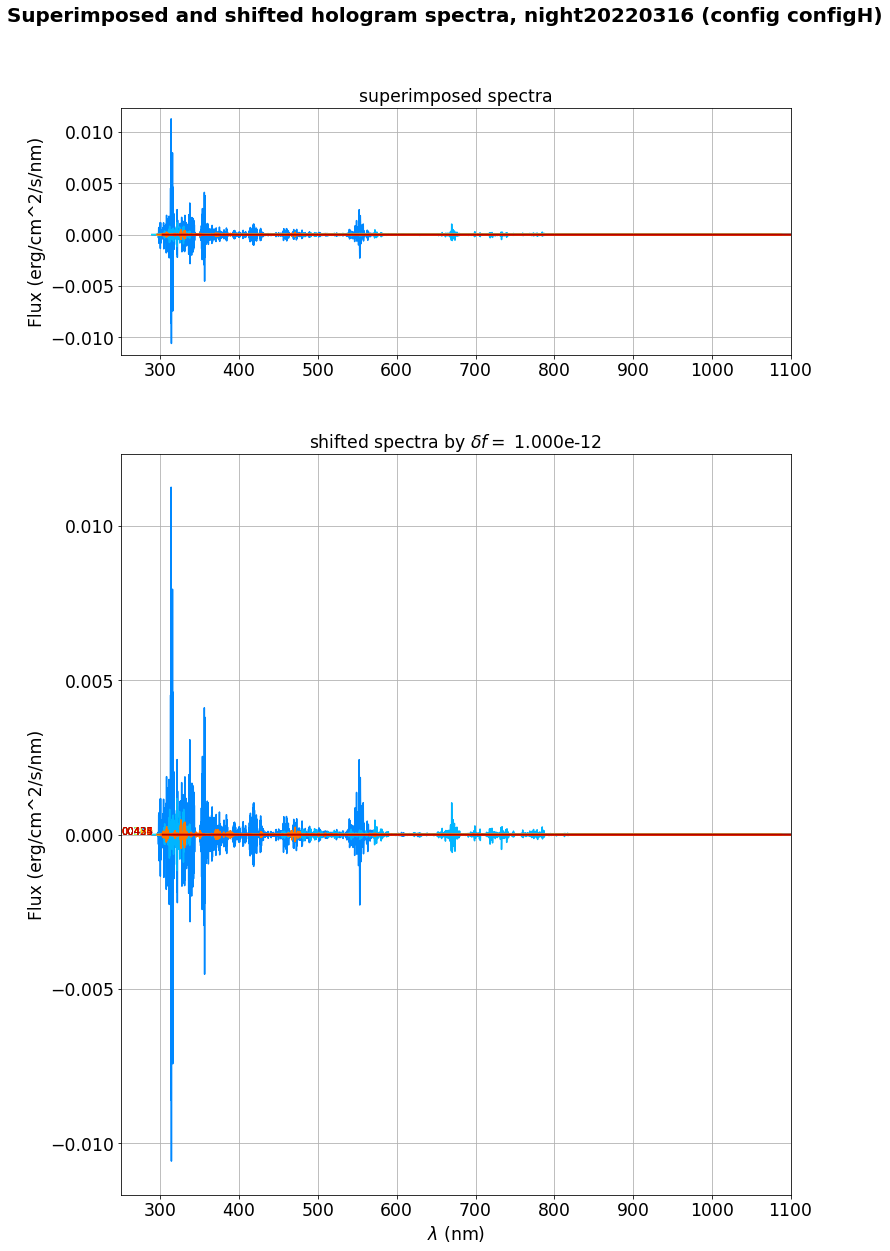

In [55]:
thetitle2 = f"Superimposed and shifted hologram spectra, night{DATE} (config {configdir})"
sumfig2 = SaveFigSpectraSummaryBothInPdf(all_lambdas,all_data,all_num,delta=0.1e-11,thetitle=thetitle2)

In [56]:
all_figs.append(sumfig2)

### Save in pdf file

In [57]:
# Write all images in pdf files

#multipage_pdf_file = f'multipage_pdf_holo_{DATE}_{configdir}.pdf'
# gerate a multipage pdf:
#with PdfPages(multipage_pdf_file) as pdf:
#    for fig in all_figs:
#        pdf.savefig(fig)
#        plt.close()


## View one spectrum

1 ) exposure_2022031600331_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits
No rebinning: parameters.REBIN is forced to 1.
set date_obs to 2022-03-17T01:59:56.544
set expo to 20.0
set airmass to 1.386860919079735
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.143414192888017
set dec to -66.0397222222222
set hour_angle to 42.19664412811424
set temperature to 10.6
set pressure to 743.55
set humidity to 44.0
set lambda_ref to 640.2918338104603
set parallactic_angle to 56.75888867802155
target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      ... Z_VALUE_47 SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                            
----------- ------------- ------------- ... ---------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635 ...  0.0000590               

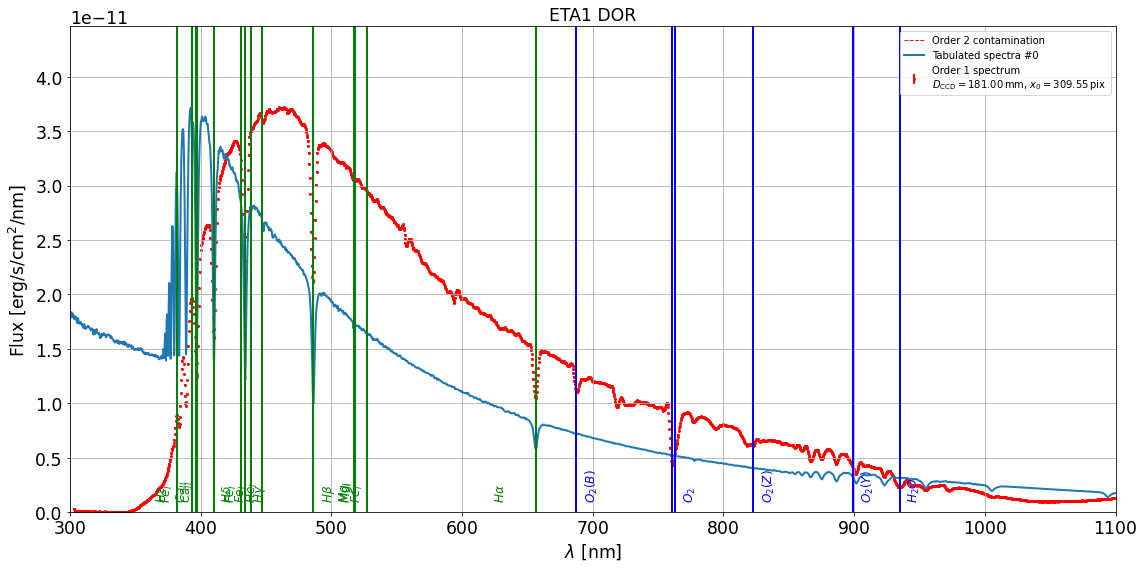

In [58]:
idx=1

fullfilename = all_good_spectra_spectrum_files[idx]
    
filename = os.path.basename(fullfilename)
print(idx,")",filename," ",fullfilename)
    
    
fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
    
filename= os.path.basename(fullfilename)
tag=file_tag_forsorting(filename.split(".")[0])
all_num.append(tag)
    
   
     
s=Spectrum(fullfilename, config=config,fast_load=False)
label=filename.split('.')[0]+" "
#s.plot_spectrum(ax=ax1,force_lines=True,label=label)
s.plot_spectrum(ax=ax1,force_lines=True)
    
    
#ax2 = fig.add_subplot(1, 2, 2)
    
#fullfilename2=all_files_spectrogram[idx]
    
#s.load_spectrogram(fullfilename2)
#s.plot_spectrogram(ax=ax2,scale="log")
    

plt.show()
    

In [59]:
all_figs.append(fig)

## Info

In [60]:
df_infos=pd.DataFrame(infos,columns=["idx","object","date_obs","airmass","temperature","pressure","humidity"])

In [61]:
df_infos.set_index('idx',inplace=True)

In [62]:
all_reftime=[ (Time(tt)-Time( df_infos["date_obs"].values[0])).to_value(u.hr) for tt in df_infos["date_obs"].values ]

In [63]:
all_reftime=np.array(all_reftime)

In [64]:
df_infos["reftime"]=all_reftime

In [65]:
NN = len(df_infos)

In [66]:
df_infos

object                 date_obs   airmass  temperature  pressure  \
idx                                                                       
0    ETA1 DOR  2022-03-17T01:59:23.629  1.385782         10.6    743.55   
1    ETA1 DOR  2022-03-17T01:59:56.544  1.386861         10.6    743.55   
2    ETA1 DOR  2022-03-17T02:02:50.136  1.392651         10.6    743.55   
3    ETA1 DOR  2022-03-17T02:06:16.878  1.399703         10.5    743.55   
4    ETA1 DOR  2022-03-17T02:06:49.784  1.400843         10.5    743.55   
5    HD111980  2022-03-17T02:10:46.532  1.646195         10.5    743.60   
6    HD111980  2022-03-17T02:14:16.103  1.618469         10.5    743.55   
7    HD111980  2022-03-17T02:18:18.332  1.587925         10.5    743.60   
8    ETA1 DOR  2022-03-17T02:22:24.873  1.435249         10.5    743.55   
9    ETA1 DOR  2022-03-17T02:22:57.958  1.436534         10.4    743.50   
10   ETA1 DOR  2022-03-17T02:25:53.644  1.443481         10.5    743.45   
11   ETA1 DOR  2022-03-17T02:26:26.585  1.444799         10.5    743.45   
12   ETA1 DOR  2022-03-17T02:29:22.897  1.451937         10.5    743.50   
13   ETA1 DOR  2022-03-17T02:29:55.894  1.453288         10.5    743.50   
14   HD111980  2022-03-17T02:34:01.617  1.482239         10.5    743.50   
15   ETA1 DOR  2022-03-17T02:38:42.076  1.475574         10.5    743.50   
16   ETA1 DOR  2022-03-17T02:39:14.980  1.477007         10.5    743.50   
17   HD111980  2022-03-17T03:11:44.414  1.295018         10.6    743.50   
18   HD111980  2022-03-17T03:12:17.424  1.292831         10.6    743.50   
19   HD111980  2022-03-17T03:15:14.374  1.281317         10.7    743.50   
20   HD111980  2022-03-17T03:15:47.551  1.279213         10.7    743.50   
21   HD111980  2022-03-17T03:21:35.700  1.257765         10.7    743.50   
22   HD111980  2022-03-17T03:22:08.720  1.255802         10.7    743.50   

     humidity   reftime  
idx                      
0        44.0  0.000000  
1        44.0  0.009143  
2        43.0  0.057363  
3        43.0  0.114791  
4        43.0  0.123932  
5        43.0  0.189695  
6        43.0  0.247909  
7        42.0  0.315195  
8        42.0  0.383679  
9        42.0  0.392869  
10       42.0  0.441671  
11       42.0  0.450821  
12       42.0  0.499797  
13       42.0  0.508962  
14       42.0  0.577219  
15       43.0  0.655124  
16       43.0  0.664264  
17       51.0  1.205774  
18       51.0  1.214943  
19       50.0  1.264096  
20       49.0  1.273312  
21       49.0  1.370020  
22       49.0  1.379192

In [67]:
summary_file = f"summaryspectra_{DATE}_{configdir}.csv"
df_infos.to_csv(summary_file)

Text(0.5, 1.0, 'airmassvs vs date')

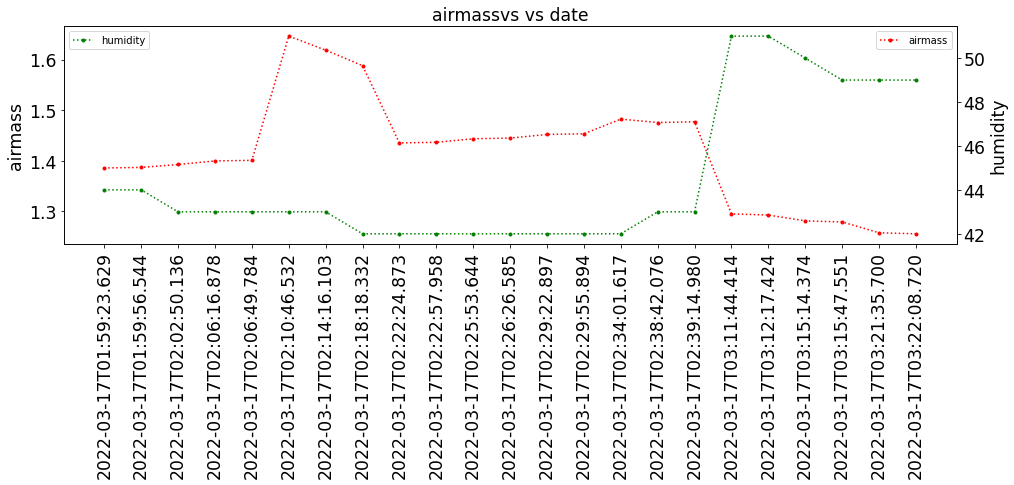

In [68]:
fig=plt.figure(figsize=(16,4))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_infos['date_obs'], df_infos['airmass'],linestyle='dotted', marker='.',color="red",label="airmass")
#ax.set_xticks(rotation='vertical');
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel("airmass")
ax.legend(loc="upper right")

ax2 = ax.twinx()
ax2.plot(df_infos['date_obs'], df_infos['humidity'],linestyle='dotted', marker='.',color="green",label="humidity")
ax2.set_ylabel("humidity")
ax2.legend(loc="upper left")
ax.set_title("airmassvs vs date")

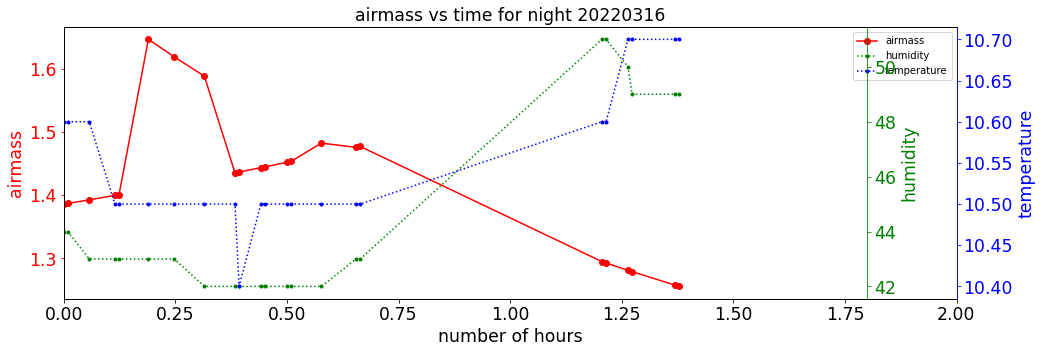

In [69]:
fig=plt.figure(figsize=(16,5))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1,= ax.plot(df_infos['reftime'], df_infos['airmass'],marker="o",color="red",label="airmass")
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.set_xlim(0,np.ceil(df_infos['reftime'].values.max()))
ax.set_ylabel("airmass")
ax2 = ax.twinx()
p2, = ax2.plot(df_infos['reftime'], df_infos['humidity'],linestyle='dotted', marker='.',color="green",label="humidity")
ax2.set_ylabel("humidity")
ax2.spines["right"].set_position(("axes", 0.9))

ax3 = ax.twinx()

ax3.spines["right"].set_position(("axes", 1.0))
p3, = ax3.plot(df_infos['reftime'], df_infos['temperature'],linestyle='dotted', marker='.',color="blue",label="temperature")
ax3.set_ylabel("temperature")

curves = [p1, p2, p3]
ax.legend(curves, [c.get_label() for c in curves])

ax.set_title(f"airmass vs time for night {DATE}")

ax.yaxis.label.set_color(p1.get_color())
ax2.yaxis.label.set_color(p2.get_color())
ax3.yaxis.label.set_color(p3.get_color())

ax2.spines["right"].set_edgecolor(p2.get_color())
ax3.spines["right"].set_edgecolor(p3.get_color())

ax.tick_params(axis='y', colors=p1.get_color())
ax2.tick_params(axis='y', colors=p2.get_color())
ax3.tick_params(axis='y', colors=p3.get_color())
plt.show()


In [70]:
all_figs.append(fig)

# Header info

In [71]:
NN=len(all_good_spectra_spectrum_files)

all_rebin=np.zeros(NN)
all_targetx=np.zeros(NN)
all_targety=np.zeros(NN)
all_rotangle=np.zeros(NN)
all_d2ccd=np.zeros(NN)
all_pixshift=np.zeros(NN)
all_chi2_fit=np.zeros(NN)
all_a2_fit=np.zeros(NN)
all_lbda_ref=np.zeros(NN)
all_tagnumber=np.zeros(NN)


for idx in range(NN):
    
    fullfilename=all_good_spectra_spectrum_files[idx]
    
    filename= os.path.basename(fullfilename)
    hdul=fits.open(fullfilename)
    header=hdul[0].header
    tagnum=str(all_num[idx])
    
    #ROTANGLE=  -0.1367006901184345 / [deg] angle of the dispersion axis             
    #D2CCD   =    179.6778868175837 / [mm] distance between disperser and CCD        
    #TARGETX =    315.9547462941386 / target position on X axis                      
    #TARGETY =    75.06785960446246 / target position on Y axis                      
    #LBDA_REF=    634.9155139280113                                                  
    #PIXSHIFT=  -0.9996981508176748                                                  
    #CHI2_FIT=    1.602115867259752                                                  
    #A2_FIT  =                  1.0                                                  
    #REBIN   =                    2 / original image rebinning factor to get spectrum
    
    rebin=header["REBIN"]
    targetx=header["TARGETX"]*rebin
    targety=header["TARGETY"]*rebin
    rotangle=header["ROTANGLE"]
    d2ccd=header["D2CCD"]
    pixshift=header["PIXSHIFT"]
    chi2_fit=header["CHI2_FIT"]
    a2_fit=header["A2_FIT"]
    lbda_ref=header["LBDA_REF"]
    
    
    all_rebin[idx]=rebin
    all_targetx[idx]=targetx
    all_targety[idx]=targety
    all_rotangle[idx]=rotangle
    all_d2ccd[idx]=d2ccd
    all_pixshift[idx]=pixshift
    all_chi2_fit[idx]=chi2_fit
    all_a2_fit[idx]=a2_fit
    all_lbda_ref[idx]=lbda_ref
    all_tagnumber[idx]=tagnum
    

In [72]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2330                                                  
NAXIS2  =                    3                                                  
EXTEND  =                    T                                                  
ORIGIN  = 'LSST DM Header Service'                                              
TIMESYS = 'TAI     '                                                            
DATE    = '2022-03-17T03:22:08.720'                                             
DATE-OBS= '2022-03-17T03:22:08.720'                                             
DATE-BEG= '2022-03-17T03:22:22.856'                                             
DATE-END= '2022-03-17T03:22:43.098'                                             
MJD     =     59655.14037870

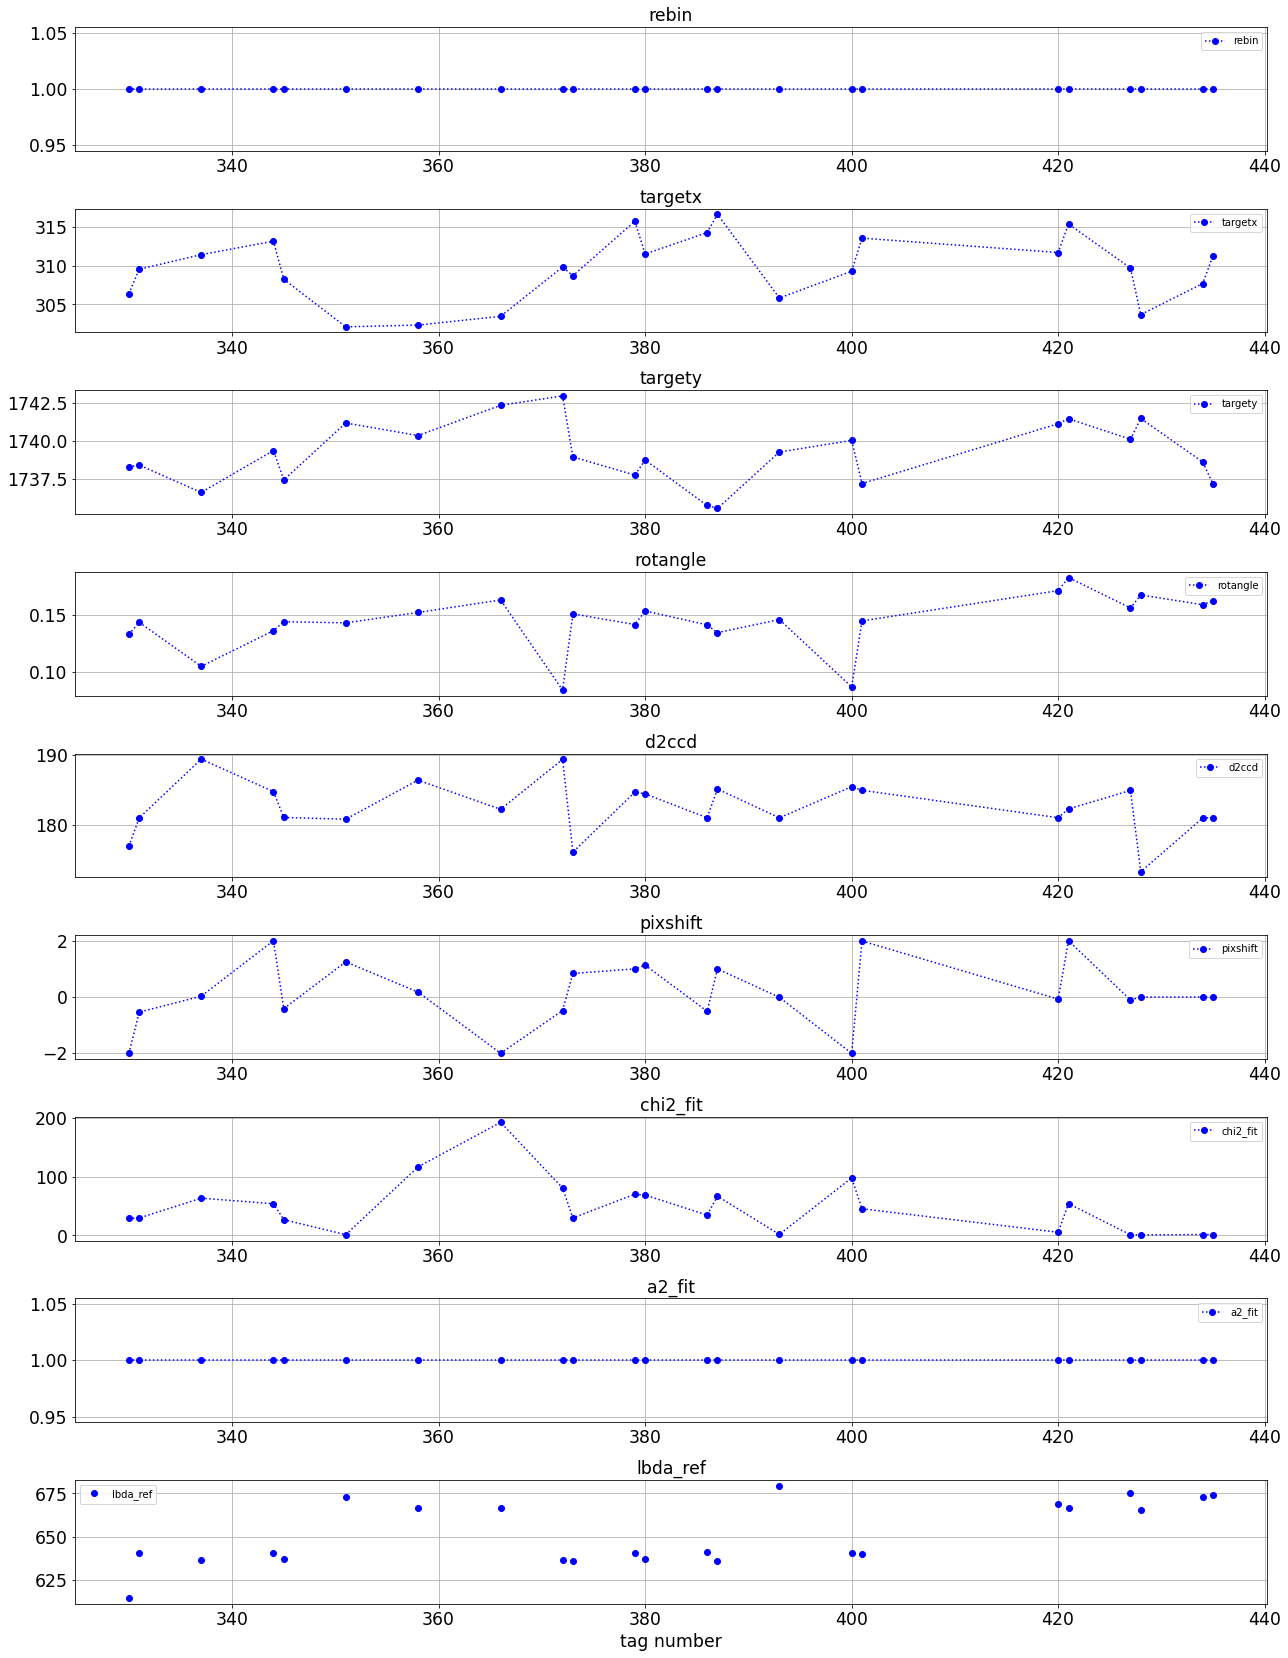

In [73]:
fig=plt.figure(figsize=(18,25))

# rebin
ax=fig.add_subplot(10,1,1)
ax.plot(all_tagnumber,all_rebin,"b:o",label="rebin")
ax.legend()
ax.grid()
ax.set_title("rebin")

#targetx
ax=fig.add_subplot(10,1,2)
ax.plot(all_tagnumber,all_targetx,"b:o",label="targetx")
ax.legend()
ax.grid()
ax.set_title("targetx")



#targety
ax=fig.add_subplot(10,1,3)
ax.plot(all_tagnumber,all_targety,"b:o",label="targety")
ax.legend()
ax.grid()
ax.set_title("targety")



#rotangle
ax=fig.add_subplot(10,1,4)
ax.plot(all_tagnumber,all_rotangle,"b:o",label="rotangle")
ax.legend()
ax.grid()
ax.set_title("rotangle")

#d2ccd
ax=fig.add_subplot(10,1,5)
ax.plot(all_tagnumber,all_d2ccd,"b:o",label="d2ccd")
ax.legend()
ax.grid()
ax.set_title("d2ccd")


#pixshift
ax=fig.add_subplot(10,1,6)
ax.plot(all_tagnumber,all_pixshift,"b:o",label="pixshift")
ax.legend()
ax.grid()
ax.set_title("pixshift")


#chi2_fit
ax=fig.add_subplot(10,1,7)
ax.plot(all_tagnumber,all_chi2_fit,"b:o",label="chi2_fit")
ax.legend()
ax.grid()
ax.set_title("chi2_fit")

#a2_fit
ax=fig.add_subplot(10,1,8)
ax.plot(all_tagnumber,all_a2_fit,"b:o",label="a2_fit")
ax.legend()
ax.grid()
ax.set_title("a2_fit")


#all_lbda_ref
ax=fig.add_subplot(10,1,9)
ax.plot(all_tagnumber,all_lbda_ref,"bo",label="lbda_ref")
ax.legend()
ax.grid()
ax.set_title("lbda_ref")

ax.set_xlabel("tag number")
plt.tight_layout()
plt.show()


In [74]:
all_figs.append(fig)

# Write in pdf file

In [75]:
# Write all images in pdf files
multipage_pdf_file = f'multipage_pdf_holo_{DATE}_{configdir}.pdf'
# gerate a multipage pdf:
with PdfPages(multipage_pdf_file) as pdf:
    for fig in all_figs:
        pdf.savefig(fig)
        plt.close()

# write in pickles files

In [ ]:
all_out_data = {}

for idx in range(NN):
    if FLAG_ORDER2:
        thedata = {'number':all_tagnumber[idx],
               'object':df_infos.iloc[idx]['object'],
               'dateobs':df_infos.iloc[idx]['date_obs'],
               'refhour':df_infos.iloc[idx]['reftime'],
               'airmass':df_infos.iloc[idx]['airmass'], 
               'pressure':df_infos.iloc[idx]['pressure'], 
               'temperature':df_infos.iloc[idx]['temperature'], 
               'humidity':df_infos.iloc[idx]['humidity'], 
               'targetx_pix':all_targetx[idx],
               'targety_pix':all_targety[idx],
               'rotangle':all_rotangle[idx],
               'd2ccd':all_d2ccd[idx],
               'all_lambdas':all_lambdas[idx],
               'all_fluxes':all_data[idx],
               'all_fluxes_err':all_data_err[idx],
               'all_lambdas_order2':all_lambdas_order2[idx],
               'all_fluxes_order2':all_data_order2[idx],
               'all_fluxes_err_order2':all_data_err_order2[idx],
              }
    else:
        thedata = {'number':all_tagnumber[idx],
               'object':df_infos.iloc[idx]['object'],
               'dateobs':df_infos.iloc[idx]['date_obs'],
               'refhour':df_infos.iloc[idx]['reftime'],
               'airmass':df_infos.iloc[idx]['airmass'],
               'pressure':df_infos.iloc[idx]['pressure'], 
               'temperature':df_infos.iloc[idx]['temperature'], 
               'humidity':df_infos.iloc[idx]['humidity'], 
               'targetx_pix':all_targetx[idx],
               'targety_pix':all_targety[idx],
               'rotangle':all_rotangle[idx],
               'd2ccd':all_d2ccd[idx],
               'all_lambdas':all_lambdas[idx],
               'all_fluxes':all_data[idx],
               'all_fluxes_err':all_data_err[idx],
            }         
            
    all_out_data[os.path.basename(all_good_spectra_spectrum_files[idx])]=thedata


In [ ]:
all_out_data = {}

for idx in range(NN):
    if FLAG_ORDER2:
        thedata = {'number':all_tagnumber[idx],
               'object':df_infos['object'].values,
               'dateobs':df_infos['date_obs'].values,
               'refhour':df_infos['reftime'].values,
               'airmass':df_infos['airmass'].values, 
               'pressure':df_infos['pressure'].values, 
               'temperature':df_infos['temperature'].values, 
               'humidity':df_infos['humidity'].values, 
               'targetx_pix':all_targetx[idx],
               'targety_pix':all_targety[idx],
               'rotangle':all_rotangle[idx],
               'd2ccd':all_d2ccd[idx],
               'all_lambdas':all_lambdas[idx],
               'all_fluxes':all_data[idx],
               'all_fluxes_err':all_data_err[idx],
               'all_lambdas_order2':all_lambdas_order2[idx],
               'all_fluxes_order2':all_data_order2[idx],
               'all_fluxes_err_order2':all_data_err_order2[idx],
              }
    else:
        thedata = {'number':all_tagnumber[idx],
               'object':df_infos['object'].values,
               'dateobs':df_infos['date_obs'].values,
               'refhour':df_infos['reftime'].values,
               'airmass':df_infos['airmass'].values, 
               'pressure':df_infos['pressure'].values, 
               'temperature':df_infos['temperature'].values, 
               'humidity':df_infos['humidity'].values, 
               'targetx_pix':all_targetx[idx],
               'targety_pix':all_targety[idx],
               'rotangle':all_rotangle[idx],
               'd2ccd':all_d2ccd[idx],
               'all_lambdas':all_lambdas[idx],
               'all_fluxes':all_data[idx],
               'all_fluxes_err':all_data_err[idx],
            }         
            
    all_out_data[os.path.basename(all_good_spectra_spectrum_files[idx])]=thedata


In [77]:
pkl_outfilename=f'run-auxtel-holo-{DATE}-{configdir}.pickle'

with open(pkl_outfilename, 'wb') as pickle_file:
    pickle.dump(all_out_data,pickle_file)


In [78]:
pkl_infilename=pkl_outfilename

In [79]:
with open(pkl_infilename, 'rb') as pickle_file:
    content = pickle.load(pickle_file)


In [80]:
#content

In [81]:
# Get first value of dictionary
next(iter(content.items()))

('exposure_2022031600330_postisrccd_spectrum.fits',
 {'number': 330.0,
  'targetx_pix': 306.4031113613694,
  'targety_pix': 1738.275820199141,
  'rotangle': 0.1328767654984717,
  'd2ccd': 176.9922080244429,
  'all_lambdas': array([ 311.25462894,  311.6155665 ,  311.97650114, ..., 1136.0056202 ,
         1136.35101396, 1136.69639755]),
  'all_fluxes': array([ 7.66130896e-12, -1.82809768e-11,  1.89533615e-11, ...,
         -2.45830932e-09, -2.45794644e-09, -2.45738654e-09]),
  'all_fluxes_err': array([4.40420784e-13, 1.78717779e-12, 3.83567128e-12, ...,
         6.82383741e-08, 6.82401353e-08, 6.82300767e-08]),
  'all_lambdas_order2': array([ 310.53277044,  310.89371389,  311.25465442, ..., 1135.315081  ,
         1135.66049526, 1136.00589935]),
  'all_fluxes_order2': array([ 23974.51130829, -55039.4198305 ,  52424.15334257, ...,
          16380.61123279,  16370.49712106,  16359.34334636]),
  'all_fluxes_err_order2': array([9.69426114e+02, 3.79040024e+03, 7.77108737e+03, ...,
         3.